In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pretty_midi
!pip install midi2audio
!sudo apt-get install fluidsynth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 46.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 5.1 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592303 sha256=f8a313abd9b002054b1568309a6e3ccbcf97c45b46d2f0b7d25474c5e265101f
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libfluidsynth2 libinstpatch-1.0-2 qsynth
  timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs timidity jackd musescore
The

In [3]:
import librosa
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    piano_roll = pm.get_piano_roll(fs)[start_pitch:end_pitch]

    # Threshold the piano roll to binary values
    piano_roll[piano_roll > 0] = 1
    librosa.display.specshow(piano_roll,
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

In [4]:
import pretty_midi
import numpy as np
import matplotlib.pyplot as plt

def visualization(midi_file_path):
    midi_data = pretty_midi.PrettyMIDI(midi_file_path)
    plot_piano_roll(midi_data, 24, 100)

    print('There are {} time signature changes'.format(len(midi_data.time_signature_changes)))
    print('There are {} instruments'.format(len(midi_data.instruments)))

In [5]:
from midi2audio import FluidSynth
import os

def sonification(midi_file_path, wav_path):
    fs = FluidSynth()
    full_path = os.path.join(wav_path, os.path.basename(midi_file_path)[:-4] + '.wav')
    fs.midi_to_audio(midi_file_path, full_path)
    return full_path

In [19]:
root = '/content/drive/MyDrive/new_music/results/'
file_list = os.listdir(root)
file_list_original = sorted([x for x in file_list if 'original' in x])
file_list_continuation = sorted([x for x in file_list if 'continuation' in x])

In [20]:
print(len(file_list_continuation))
print(file_list_original[1])

593
original_Bach, Johann Sebastian, 15 Sinfonias, BWV 787-801, ntLGHRX5XOE_startat26624.mid


In [17]:
print(midi_file_path_original)

/content/drive/MyDrive/new_music/results_pop/original_020_startat512.mid


<ipython-input-3-0ee6787bc865>:8: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(piano_roll,


There are 1 time signature changes
There are 1 instruments


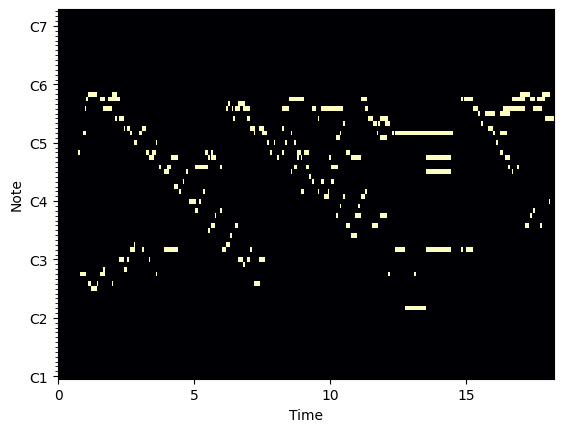

In [39]:
midi_file_path_original = root + file_list_original[40]
midi_file_path_continuation = root + file_list_continuation[40]
visualization(midi_file_path_original)

<ipython-input-3-0ee6787bc865>:8: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(piano_roll,


There are 1 time signature changes
There are 1 instruments


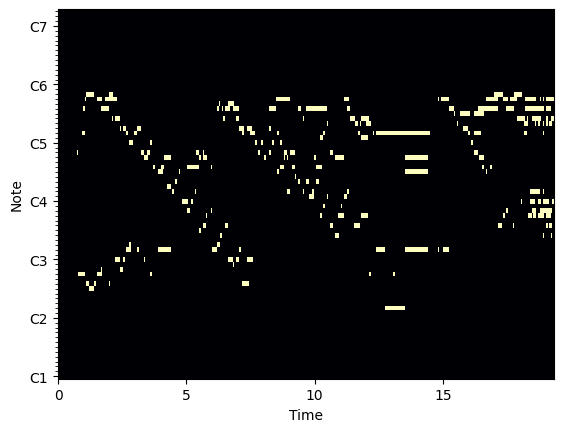

In [40]:
visualization(midi_file_path_continuation)

In [ ]:
wav_path = '/content/drive/MyDrive/theme_transformer/wav_data/'
original_audio_path = sonification(midi_file_path_original, wav_path)
continuation_audio_path = sonification(midi_file_path_continuation, wav_path)

In [ ]:
import IPython.display as ipd

In [ ]:
ipd.Audio(original_audio_path)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ipd.Audio(continuation_audio_path)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(len(file_list))

32
